Luokiteltu jakauma

Määrällisen muuttujan jakaumaan tutustuminen luokitellun jakauman kautta. Voidaan esittää frekvenssitaulukkonta tai histogrammina

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [3]:
#Määritellään luokkarajat palkan luokittelemiseksi
bins = [1000, 2000, 3000, 4000, 7000]

#Lisätää sarake
df["palkkaluokka"] = pd.cut(df["palkka"], bins=bins, right=False)

df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja,palkkaluokka
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,"[3000, 4000)"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,"[2000, 3000)"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,"[1000, 2000)"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,"[2000, 3000)"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,"[2000, 3000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN,"[1000, 2000)"
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN,"[1000, 2000)"
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN,"[2000, 3000)"
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN,"[2000, 3000)"


In [5]:
#Frekvenssitaulukko
df1 = pd.crosstab(df["palkkaluokka"], "f")

df1.columns.name = ""

#Prosentit
n = df1['f'].sum()
df1["%"] = df1["f"]/n*100

#Yhteensä
df1.loc["Yhteensä"]= df1.sum()

df1.style.format({'f':"{:.0f}", "%":"{:.1f}"})

,f,%
palkkaluokka,,
"[1000, 2000)",19,23.2
"[2000, 3000)",50,61.0
"[3000, 4000)",8,9.8
"[4000, 7000)",5,6.1
Yhteensä,82,100.0


Histogrammi

Histogrammi on nopein keino luokitellun jakauman tarkasteluun. Sitä varten ei tarvitse laskea luokiteltua jakaumaa taulukkona.

Text(0, 0.5, 'lkm, n = 82')

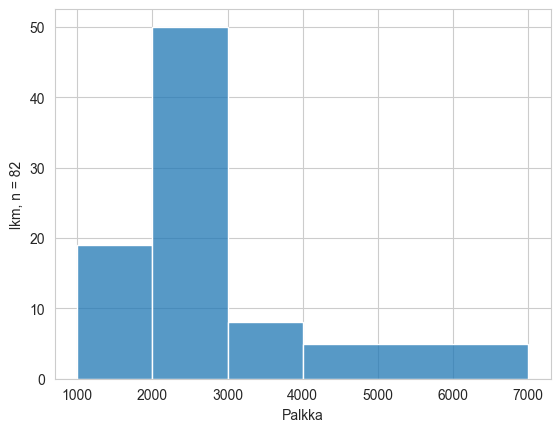

In [6]:
sns.histplot(df['palkka'], bins=bins)

#Havaintojen lkm
n = df['palkka'].count()

plt.xlabel("Palkka")
plt.ylabel(f'lkm, n = {n}')

Text(0, 0.5, '%, n = 82')

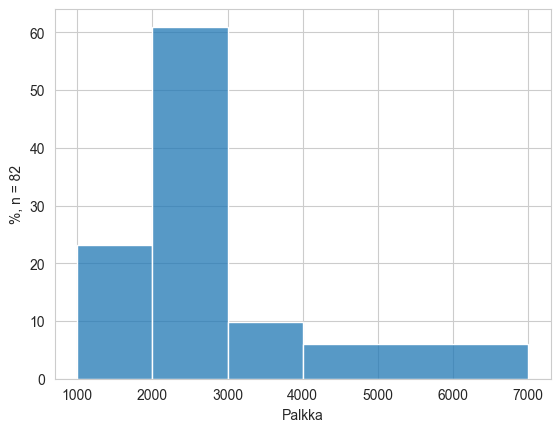

In [7]:
#Histogrammi, jossa y-akselilla prosentit
sns.histplot(df["palkka"], bins=bins, stat='percent')

n = df['palkka'].count()

plt.xlabel("Palkka")
plt.ylabel(f'%, n = {n}')